# Milestone 2

Objectives:
• Perform further data analysis and select appropriate models for classification tasks.

Import Needed Libs

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data From Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/DEPI/Data/Processed_Data"
print(os.listdir(data_path))

Mounted at /content/drive
['RGB', 'RGB_NIR', 'NDVI']


In [ ]:
rgb_path='/content/drive/My Drive/DEPI/Data/Processed_Data/RGB'
rgb_nir_path = '/content/drive/My Drive/DEPI/Data/Processed_Data/RGB_NIR'
ndvi_path ='/content/drive/My Drive/DEPI/Data/Processed_Data/NDVI'

print("RGB shape:", os.listdir(rgb_path))
print("RGB + NIR shape:", os.listdir(rgb_nir_path))
print("NDVI shape:", os.listdir(ndvi_path))

RGB shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
RGB + NIR shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
NDVI shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [ ]:
def count_images_in_folders(root_path):
    for main_dir in os.listdir(root_path):
        main_dir_path = os.path.join(root_path, main_dir)
        if not os.path.isdir(main_dir_path):
            continue

        print(f"\n📁 {main_dir} Folder:")
        total_images = 0

        for category in os.listdir(main_dir_path):
            category_path = os.path.join(main_dir_path, category)
            if not os.path.isdir(category_path):
                continue

            image_count = len([
                file for file in os.listdir(category_path)
            ])

            total_images += image_count
            print(f"  📂 {category}: {image_count} images")

        print(f"🔢 Total in {main_dir}: {total_images} images")


In [ ]:
count_images_in_folders(data_path)


📁 RGB Folder:
  📂 AnnualCrop: 6000 images
  📂 Forest: 6000 images
  📂 HerbaceousVegetation: 6000 images
  📂 Highway: 5000 images
  📂 Industrial: 5000 images
  📂 Pasture: 4000 images
  📂 PermanentCrop: 5000 images
  📂 Residential: 6000 images
  📂 River: 4723 images
  📂 SeaLake: 6000 images
🔢 Total in RGB: 53723 images

📁 RGB_NIR Folder:
  📂 AnnualCrop: 3000 images
  📂 Forest: 3000 images
  📂 HerbaceousVegetation: 3000 images
  📂 Highway: 2500 images
  📂 Industrial: 2500 images
  📂 Pasture: 2000 images
  📂 PermanentCrop: 2500 images
  📂 Residential: 3000 images
  📂 River: 2361 images
  📂 SeaLake: 3000 images
🔢 Total in RGB_NIR: 26861 images

📁 NDVI Folder:
  📂 AnnualCrop: 3000 images
  📂 Forest: 3000 images
  📂 HerbaceousVegetation: 3000 images
  📂 Highway: 2500 images
  📂 Industrial: 2500 images
  📂 Pasture: 2000 images
  📂 PermanentCrop: 2500 images
  📂 Residential: 3000 images
  📂 River: 2361 images
  📂 SeaLake: 3000 images
🔢 Total in NDVI: 26861 images


## 1. Advanced Data Analysis:

### Analyze the relationship between different spectral bands and land types to determine which bands are most useful for classification.

In [ ]:
# Done before at milestone 1 while doing the plots of different bands

### Use dimensionality reduction techniques (e.g., PCA – Principal Component Analysis) to reduce the number of features while preserving important information in the satellite images.

In [ ]:
# We used EUROSAT Images that are already label with samll size, so no need for PCA

## 2. Model Selection:

### Choose suitable machine learning models for image classification, particularly DNNs (Deep Neural Networks).

In [ ]:
# We Will use CNN Model

### Start with a simple CNN (Convolutional Neural Network) model and experiment with more advanced architectures such as ResNet, VGG, or U-Net if working with pixel-wise classification.

###  Explore transfer learning techniques by using pre-trained models on similar datasets (e.g., ImageNet or EuroSat) and fine-tune them for land type classification.

## 3. Data Visualization:

### isualize the correlation between the spectral bands and the land types.

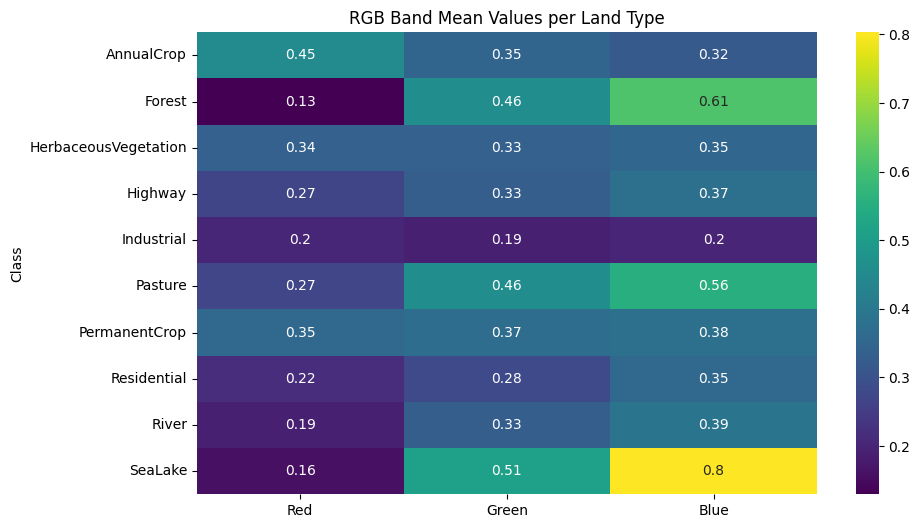

In [ ]:
def visualize_rgb_correlation(base_dir=rgb_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='viridis')
    plt.title("RGB Band Mean Values per Land Type")
    plt.show()
visualize_rgb_correlation()

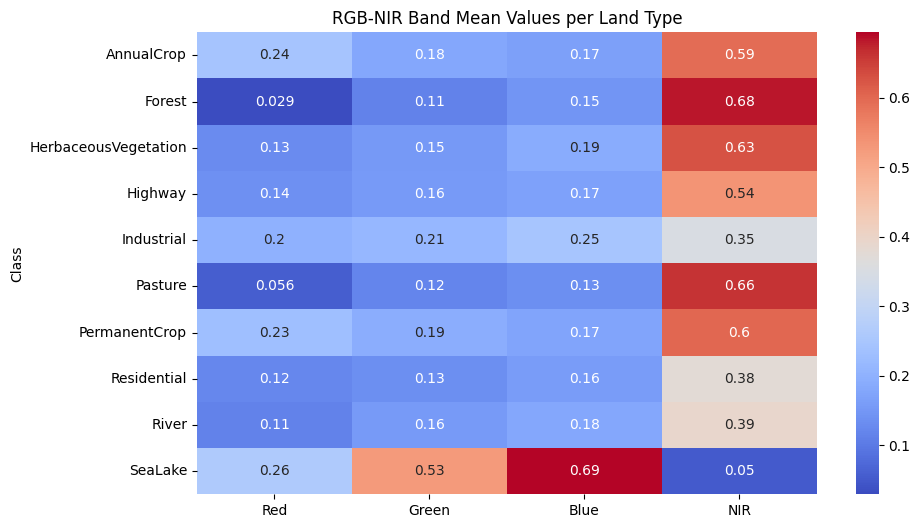

In [ ]:
def visualize_rgb_nir_correlation(base_dir=rgb_nir_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue', 'NIR']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='coolwarm')
    plt.title("RGB-NIR Band Mean Values per Land Type")
    plt.show()
visualize_rgb_nir_correlation()

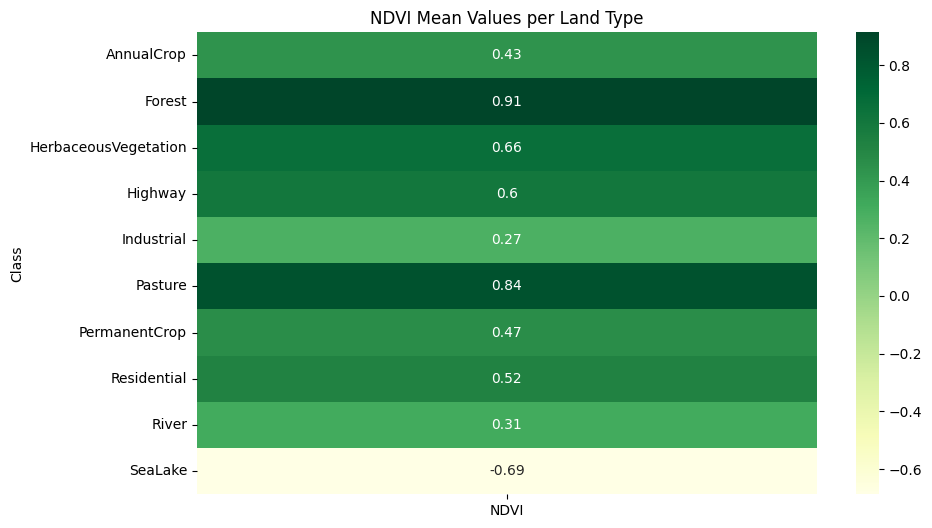

In [ ]:
def visualize_ndvi_correlation(base_dir=ndvi_path, n_samples=10):
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            if img.ndim == 3:
                img = img.squeeze()
            mean_ndvi = img.mean()
            data.append({'NDVI': mean_ndvi, 'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='YlGn')
    plt.title("NDVI Mean Values per Land Type")
    plt.show()
visualize_ndvi_correlation()

# Selecting the suitable model for the training